### Packages

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display, Markdown

### Import Datasets

In [17]:
loan_data_inputs_train = pd.read_csv('loan_data_inputs_train.csv', index_col = 0)
df_targets_train = pd.read_csv('loan_data_targets_train.csv', index_col = 0)
loan_data_inputs_test = pd.read_csv('loan_data_inputs_test.csv', index_col = 0)
df_targets_test = pd.read_csv('loan_data_targets_test.csv', index_col = 0)

In [18]:
loan_data_inputs_train.head(1)

,Unnamed: 0,id,safra,y,VAR_1,VAR_2,VAR_3,VAR_4,VAR_6,VAR_7,...,VAR_53:<=579.042,VAR_53:>579.042,VAR_54:Missing,VAR_54:<=665.297,VAR_54:>665.297,VAR_65:Missing,VAR_65:<=1120.334,VAR_65:>1120.334,VAR_72:<=85.6,VAR_72:>85.6
7477,7477,7478,201407,0,16.0,0.0,0.0,0.0,292.0,15.43,...,0,1,0,0,1,0,1,0,0,1


In [19]:
df_targets_train.head()

,target
7477,1
9608,0
2732,1
9250,1
7877,1


In [20]:
loan_data_inputs_train.shape

(8590, 99)

In [21]:
df_targets_train.shape

(8590, 1)

In [22]:
loan_data_inputs_test.shape

(2148, 99)

In [23]:
df_targets_test.shape

(2148, 1)

### Select the features

In [24]:
all_features = ['VAR_2:0', 'VAR_2:1-14_or_missing', 'VAR_3:Missing', 'VAR_3:0',
       'VAR_3:1-10', 'VAR_4:Missing', 'VAR_4:0', 'VAR_4:1-14',
       'VAR_20:3-10', 'VAR_20:11-12', 'VAR_28:Missing', 'VAR_28:0_8',
       'VAR_28:1-7_9-12', 'VAR_32:<0.13', 'VAR_32:>=0.13', 'VAR_33:0',
       'VAR_33:>0_or_missing', 'VAR_60:<-.025', 'VAR_60:-0.25to-0.004',
       'VAR_60:>-0.004', 'VAR_64:0', 'VAR_64:1',
       'months_since_cr_line:37-38', 'months_since_cr_line:39',
       'months_since_cr_line:40', 'months_since_cr_line:41-46',
       'months_since_cr_line:47-48', 'VAR_1:<=4.16', 'VAR_1:4.16-66.56',
       'VAR_1:66.56-128.96', 'VAR_1:>128.96_or_missing',
       'VAR_6:<=12_or_missing', 'VAR_6:12-751.44', 'VAR_6:751.44-4555.92',
       'VAR_6:>4555.92', 'VAR_7:Missing', 'VAR_7:<=62.138',
       'VAR_7:>62.138', 'VAR_9:<=606.0', 'VAR_9:>606.0', 'VAR_11:Missing',
       'VAR_11:<=108.024', 'VAR_11:>108.024', 'VAR_17:Missing',
       'VAR_17:<=2833.422', 'VAR_17:>2833.422', 'VAR_22:<=2.44',
       'VAR_22:>2.44', 'VAR_35:Missing', 'VAR_35:<=190.022',
       'VAR_35:>190.022', 'VAR_53:Missing', 'VAR_53:<=579.042',
       'VAR_53:>579.042', 'VAR_54:Missing', 'VAR_54:<=665.297',
       'VAR_54:>665.297', 'VAR_65:Missing', 'VAR_65:<=1120.334',
       'VAR_65:>1120.334', 'VAR_72:<=85.6', 'VAR_72:>85.6']

In [25]:
reference_features = ['VAR_2:1-14_or_missing',
'VAR_3:Missing',
'VAR_4:Missing',
'VAR_20:11-12',
'VAR_28:Missing',
'VAR_32:<0.13',
'VAR_33:0',
'VAR_60:<-.025',
'VAR_64:1',
'months_since_cr_line:37-38',
'VAR_1:>128.96_or_missing',
'VAR_6:<=12_or_missing',
'VAR_7:Missing',
'VAR_9:>606.0',
'VAR_11:Missing',
'VAR_17:Missing',
'VAR_22:>2.44',
'VAR_35:Missing',
'VAR_53:Missing',
'VAR_54:Missing',
'VAR_65:Missing',
'VAR_72:<=85.6']

In [26]:
inputs_train_with_ref = loan_data_inputs_train[all_features]
inputs_train_with_ref.shape

(8590, 62)

In [27]:
inputs_train = inputs_train_with_ref.drop(reference_features, axis=1)
inputs_train.head()

,VAR_2:0,VAR_3:0,VAR_3:1-10,VAR_4:0,VAR_4:1-14,VAR_20:3-10,VAR_28:0_8,VAR_28:1-7_9-12,VAR_32:>=0.13,VAR_33:>0_or_missing,...,VAR_22:<=2.44,VAR_35:<=190.022,VAR_35:>190.022,VAR_53:<=579.042,VAR_53:>579.042,VAR_54:<=665.297,VAR_54:>665.297,VAR_65:<=1120.334,VAR_65:>1120.334,VAR_72:>85.6
7477,1,1,0,1,0,0,1,0,0,0,...,1,1,0,0,1,0,1,1,0,1
9608,1,1,0,1,0,0,1,0,0,0,...,1,0,0,0,1,0,0,0,1,0
2732,1,1,0,1,0,0,1,0,0,0,...,1,0,1,0,1,0,1,1,0,0
9250,1,1,0,1,0,1,0,1,1,0,...,1,1,0,0,1,0,1,1,0,1
7877,1,1,0,1,0,0,0,1,1,1,...,0,1,0,0,1,0,1,0,1,0


### Logistic Regression

### Build a Logistic Regression Model with P-Values

In [28]:
# importing libraries 
import statsmodels.api as sm 
from statsmodels.tools import add_constant

In [29]:
df_targets_train.head(1)

,target
7477,1


In [30]:
df_targets_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8590 entries, 7477 to 7270
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   target  8590 non-null   int64
dtypes: int64(1)
memory usage: 134.2 KB


In [31]:
inputs_train.head(1)

,VAR_2:0,VAR_3:0,VAR_3:1-10,VAR_4:0,VAR_4:1-14,VAR_20:3-10,VAR_28:0_8,VAR_28:1-7_9-12,VAR_32:>=0.13,VAR_33:>0_or_missing,...,VAR_22:<=2.44,VAR_35:<=190.022,VAR_35:>190.022,VAR_53:<=579.042,VAR_53:>579.042,VAR_54:<=665.297,VAR_54:>665.297,VAR_65:<=1120.334,VAR_65:>1120.334,VAR_72:>85.6
7477,1,1,0,1,0,0,1,0,0,0,...,1,1,0,0,1,0,1,1,0,1


In [32]:
inputs_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8590 entries, 7477 to 7270
Data columns (total 40 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   VAR_2:0                     8590 non-null   int64
 1   VAR_3:0                     8590 non-null   int64
 2   VAR_3:1-10                  8590 non-null   int64
 3   VAR_4:0                     8590 non-null   int64
 4   VAR_4:1-14                  8590 non-null   int64
 5   VAR_20:3-10                 8590 non-null   int64
 6   VAR_28:0_8                  8590 non-null   int64
 7   VAR_28:1-7_9-12             8590 non-null   int64
 8   VAR_32:>=0.13               8590 non-null   int64
 9   VAR_33:>0_or_missing        8590 non-null   int64
 10  VAR_60:-0.25to-0.004        8590 non-null   int64
 11  VAR_60:>-0.004              8590 non-null   int64
 12  VAR_64:0                    8590 non-null   int64
 13  months_since_cr_line:39     8590 non-null   int64
 14  months_sin

In [33]:
x = inputs_train
x = add_constant(x)
x.head()

,const,VAR_2:0,VAR_3:0,VAR_3:1-10,VAR_4:0,VAR_4:1-14,VAR_20:3-10,VAR_28:0_8,VAR_28:1-7_9-12,VAR_32:>=0.13,...,VAR_22:<=2.44,VAR_35:<=190.022,VAR_35:>190.022,VAR_53:<=579.042,VAR_53:>579.042,VAR_54:<=665.297,VAR_54:>665.297,VAR_65:<=1120.334,VAR_65:>1120.334,VAR_72:>85.6
7477,1.0,1,1,0,1,0,0,1,0,0,...,1,1,0,0,1,0,1,1,0,1
9608,1.0,1,1,0,1,0,0,1,0,0,...,1,0,0,0,1,0,0,0,1,0
2732,1.0,1,1,0,1,0,0,1,0,0,...,1,0,1,0,1,0,1,1,0,0
9250,1.0,1,1,0,1,0,1,0,1,1,...,1,1,0,0,1,0,1,1,0,1
7877,1.0,1,1,0,1,0,0,0,1,1,...,0,1,0,0,1,0,1,0,1,0


In [34]:
y = df_targets_train
y.head()

,target
7477,1
9608,0
2732,1
9250,1
7877,1


In [35]:
# building the model and fitting the data 
log_reg = sm.Logit(y, x).fit()

Optimization terminated successfully.
         Current function value: 0.496252
         Iterations 6


In [36]:
print(log_reg.summary2())

                                      Results: Logit
Model:                       Logit                     Method:                    MLE      
Dependent Variable:          target                    Pseudo R-squared:          0.178    
Date:                        2024-10-07 13:31          AIC:                       8603.6057
No. Observations:            8590                      BIC:                       8878.8816
Df Model:                    38                        Log-Likelihood:            -4262.8  
Df Residuals:                8551                      LL-Null:                   -5188.4  
Converged:                   1.0000                    LLR p-value:               0.0000   
No. Iterations:              6.0000                    Scale:                     1.0000   
-------------------------------------------------------------------------------------------
                            Coef.    Std.Err.      z    P>|z|      [0.025         0.975]   
---------------------------

**Note:**
1. If the coefficient for each dummy feature is significant, we'll keep the feature;
2. If all coefficients for each dummy are not significant, we'll remove the entire feature;
3. If one or a few dummy are significant, we'll keep the entire feature
   
**Remove:**

- VAR_3
- VAR_4
- VAR_28
- VAR_33
- VAR_64
- VAR_6
- VAR_11
- VAR_22
- VAR_35
- VAR_53
- VAR_54
- VAR_72

In [37]:
all_features = ['VAR_2:0', 'VAR_2:1-14_or_missing',
       'VAR_20:3-10', 'VAR_20:11-12', 'VAR_32:<0.13', 'VAR_32:>=0.13', 'VAR_60:<-.025', 'VAR_60:-0.25to-0.004',
       'VAR_60:>-0.004', 
       'months_since_cr_line:37-38', 'months_since_cr_line:39',
       'months_since_cr_line:40', 'months_since_cr_line:41-46',
       'months_since_cr_line:47-48', 'VAR_1:<=4.16', 'VAR_1:4.16-66.56',
       'VAR_1:66.56-128.96', 'VAR_1:>128.96_or_missing',
        'VAR_7:Missing', 'VAR_7:<=62.138',
       'VAR_7:>62.138', 'VAR_9:<=606.0', 'VAR_9:>606.0', 'VAR_17:Missing',
       'VAR_17:<=2833.422', 'VAR_17:>2833.422','VAR_65:Missing', 'VAR_65:<=1120.334',
       'VAR_65:>1120.334']

In [38]:
reference_features = ['VAR_2:1-14_or_missing',
'VAR_20:11-12',
'VAR_32:<0.13',
'VAR_60:<-.025',
'months_since_cr_line:37-38',
'VAR_1:>128.96_or_missing',
'VAR_7:Missing',
'VAR_9:>606.0',
'VAR_17:Missing',
'VAR_65:Missing']

In [39]:
inputs_train_with_ref2 = loan_data_inputs_train[all_features]
inputs_train2 = inputs_train_with_ref2.drop(reference_features, axis=1)
inputs_train2.head()

,VAR_2:0,VAR_20:3-10,VAR_32:>=0.13,VAR_60:-0.25to-0.004,VAR_60:>-0.004,months_since_cr_line:39,months_since_cr_line:40,months_since_cr_line:41-46,months_since_cr_line:47-48,VAR_1:<=4.16,VAR_1:4.16-66.56,VAR_1:66.56-128.96,VAR_7:<=62.138,VAR_7:>62.138,VAR_9:<=606.0,VAR_17:<=2833.422,VAR_17:>2833.422,VAR_65:<=1120.334,VAR_65:>1120.334
7477,1,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,1,0
9608,1,0,0,1,0,0,0,0,1,0,1,0,1,0,0,0,0,0,1
2732,1,0,0,0,1,0,0,1,0,1,0,0,0,1,0,1,0,1,0
9250,1,1,1,0,1,0,0,1,0,0,1,0,0,0,0,1,0,1,0
7877,1,0,1,0,1,0,0,0,1,1,0,0,0,1,0,1,0,0,1


In [40]:
# Here we run a new model.
x = inputs_train2
x = add_constant(x)
x.head()

,const,VAR_2:0,VAR_20:3-10,VAR_32:>=0.13,VAR_60:-0.25to-0.004,VAR_60:>-0.004,months_since_cr_line:39,months_since_cr_line:40,months_since_cr_line:41-46,months_since_cr_line:47-48,VAR_1:<=4.16,VAR_1:4.16-66.56,VAR_1:66.56-128.96,VAR_7:<=62.138,VAR_7:>62.138,VAR_9:<=606.0,VAR_17:<=2833.422,VAR_17:>2833.422,VAR_65:<=1120.334,VAR_65:>1120.334
7477,1.0,1,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,1,0
9608,1.0,1,0,0,1,0,0,0,0,1,0,1,0,1,0,0,0,0,0,1
2732,1.0,1,0,0,0,1,0,0,1,0,1,0,0,0,1,0,1,0,1,0
9250,1.0,1,1,1,0,1,0,0,1,0,0,1,0,0,0,0,1,0,1,0
7877,1.0,1,0,1,0,1,0,0,0,1,1,0,0,0,1,0,1,0,0,1


In [41]:
y = df_targets_train
y.head()

,target
7477,1
9608,0
2732,1
9250,1
7877,1


In [42]:
# building the model and fitting the data 
log_reg2 = sm.Logit(y, x).fit()
print(log_reg2.summary2())

Optimization terminated successfully.
         Current function value: 0.514903
         Iterations 6
                              Results: Logit
Model:                   Logit               Method:              MLE      
Dependent Variable:      target              Pseudo R-squared:    0.148    
Date:                    2024-10-07 13:31    AIC:                 8886.0297
No. Observations:        8590                BIC:                 9027.1967
Df Model:                19                  Log-Likelihood:      -4423.0  
Df Residuals:            8570                LL-Null:             -5188.4  
Converged:               1.0000              LLR p-value:         0.0000   
No. Iterations:          6.0000              Scale:               1.0000   
---------------------------------------------------------------------------
                            Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
---------------------------------------------------------------------------
const            

In [43]:
np.exp(0.4939)

1.6386946831316989

Client with number of months since cr line between 47 and 48, the chance to be good is 1.63 high comparing with clients with 37 or 38 months

In [44]:
import pickle

In [45]:
pickle.dump(log_reg2, open('pd_model.sav', 'wb'))
# Here we export our model to a 'SAV' file with file name 'pd_model.sav'.

In [46]:
pd.options.display.max_rows = 100

### PD Model Validation (test)

#### Out-of-sample validation

In [47]:
inputs_test_with_ref2 = loan_data_inputs_test[all_features]
inputs_test2 = inputs_test_with_ref2.drop(reference_features, axis=1)
inputs_test2.head()

,VAR_2:0,VAR_20:3-10,VAR_32:>=0.13,VAR_60:-0.25to-0.004,VAR_60:>-0.004,months_since_cr_line:39,months_since_cr_line:40,months_since_cr_line:41-46,months_since_cr_line:47-48,VAR_1:<=4.16,VAR_1:4.16-66.56,VAR_1:66.56-128.96,VAR_7:<=62.138,VAR_7:>62.138,VAR_9:<=606.0,VAR_17:<=2833.422,VAR_17:>2833.422,VAR_65:<=1120.334,VAR_65:>1120.334
6870,0,0,1,0,1,0,0,1,0,0,0,1,1,0,0,0,1,1,0
3881,1,0,0,0,0,0,0,1,0,0,1,0,1,0,0,1,0,1,0
6010,1,0,1,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1
10552,1,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0
8602,1,1,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0


In [48]:
inputs_test2.shape

(2148, 19)

In [49]:
inputs_test2 = add_constant(inputs_test2)
inputs_test2.head()

,const,VAR_2:0,VAR_20:3-10,VAR_32:>=0.13,VAR_60:-0.25to-0.004,VAR_60:>-0.004,months_since_cr_line:39,months_since_cr_line:40,months_since_cr_line:41-46,months_since_cr_line:47-48,VAR_1:<=4.16,VAR_1:4.16-66.56,VAR_1:66.56-128.96,VAR_7:<=62.138,VAR_7:>62.138,VAR_9:<=606.0,VAR_17:<=2833.422,VAR_17:>2833.422,VAR_65:<=1120.334,VAR_65:>1120.334
6870,1.0,0,0,1,0,1,0,0,1,0,0,0,1,1,0,0,0,1,1,0
3881,1.0,1,0,0,0,0,0,0,1,0,0,1,0,1,0,0,1,0,1,0
6010,1.0,1,0,1,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1
10552,1.0,1,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0
8602,1.0,1,1,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0


In [50]:
inputs_test2.shape

(2148, 20)

In [51]:
y_hat_test = log_reg2.predict(inputs_test2)
# Calculates the predicted values for the dependent variable (targets)
# based on the values of the independent variables (inputs) supplied as an argument.
y_hat_test

6870     0.628533
3881     0.558792
6010     0.772417
10552    0.550323
8602     0.429254
           ...   
353      0.806413
456      0.129757
8736     0.412757
239      0.362293
3405     0.829352
Length: 2148, dtype: float64

In [52]:
df_targets_test.head()

,target
6870,1
3881,0
6010,0
10552,1
8602,1


In [53]:
loan_data_targets_test_temp = df_targets_test
loan_data_targets_test_temp.reset_index(drop = True, inplace = True)
loan_data_targets_test_temp.head()

,target
0,1
1,0
2,0
3,1
4,1


In [54]:
y_hat_test = pd.DataFrame(y_hat_test).reset_index(drop = True)

In [55]:
df_actual_predicted_probs = pd.concat([loan_data_targets_test_temp, pd.DataFrame(y_hat_test)], axis = 1)
# Concatenates two dataframes.
df_actual_predicted_probs.head()

,target,0
0,1,0.628533
1,0,0.558792
2,0,0.772417
3,1,0.550323
4,1,0.429254


In [56]:
df_actual_predicted_probs.shape

(2148, 2)

In [57]:
df_actual_predicted_probs.columns = ['loan_data_targets_test', 'y_hat_test_proba']
df_actual_predicted_probs.head()

,loan_data_targets_test,y_hat_test_proba
0,1,0.628533
1,0,0.558792
2,0,0.772417
3,1,0.550323
4,1,0.429254


In [58]:
df_actual_predicted_probs.index = inputs_test2.index
# Makes the index of one dataframe equal to the index of another dataframe.
df_actual_predicted_probs.head()

,loan_data_targets_test,y_hat_test_proba
6870,1,0.628533
3881,0,0.558792
6010,0,0.772417
10552,1,0.550323
8602,1,0.429254


#### Accuracy and Area under curve

In [59]:
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import accuracy_score

In [60]:
tr = 0.5
df_actual_predicted_probs['y_hat_test'] = np.where(df_actual_predicted_probs['y_hat_test_proba'] > tr, 1,0)
df_actual_predicted_probs.head()

,loan_data_targets_test,y_hat_test_proba,y_hat_test
6870,1,0.628533,1
3881,0,0.558792,1
6010,0,0.772417,1
10552,1,0.550323,1
8602,1,0.429254,0


In [61]:
cfm = pd.crosstab(df_actual_predicted_probs['loan_data_targets_test'], df_actual_predicted_probs['y_hat_test'], rownames=['Actual'], colnames=['Predicted'])
cfm

Predicted,0,1
Actual,,
0,204,415
1,138,1391


In [62]:
pd.crosstab(df_actual_predicted_probs['loan_data_targets_test'], df_actual_predicted_probs['y_hat_test'], 
            rownames=['Actual'], colnames=['Predicted']) / df_actual_predicted_probs.shape[0]

Predicted,0,1
Actual,,
0,0.094972,0.193203
1,0.064246,0.647579


-  For all observations that are bad (0), the model predicted only 204 observations as bad
-  For all observations that are good (1), the model predicted 1391 as good. 

In [64]:
tn = cfm[0][0]
fp = cfm[1][0]
fn = cfm[0][1]
tp = cfm[1][1]

balanced_accuracy = balanced_accuracy_score(df_actual_predicted_probs['loan_data_targets_test'], df_actual_predicted_probs['y_hat_test'])
accuracy = accuracy_score(df_actual_predicted_probs['loan_data_targets_test'], df_actual_predicted_probs['y_hat_test'])

sensitivity = tp / (tp + fn) #sensitivity = recall -> class 1
specificity = tn / (tn + fp) #specificity = -> class 0

print('Confusion Matrix: \n', cfm, '\n')

print('True Negative:', tn)
print('False Positive:', fp)
print('False Negative:', fn)
print('True Positive:', tp, '\n')

print('Balanced accuracy: \n', balanced_accuracy, '\n')
print('Accuracy: \n', accuracy, '\n')
print('Sensitivity: \n', sensitivity, '\n')
print('Specificity: \n', specificity, '\n')

Confusion Matrix: 
 Predicted    0     1
Actual              
0          204   415
1          138  1391 

True Negative: 204
False Positive: 415
False Negative: 138
True Positive: 1391 

Balanced accuracy: 
 0.6196543719643172 

Accuracy: 
 0.7425512104283054 

Sensitivity: 
 0.9097449313276651 

Specificity: 
 0.3295638126009693 



As the outcomes are not balanced, accuracy is not a good metric, then we use Balanced accuracy

In [65]:
tr = 0.9
df_actual_predicted_probs['y_hat_test'] = np.where(df_actual_predicted_probs['y_hat_test_proba'] > tr, 1,0)
df_actual_predicted_probs.head()

,loan_data_targets_test,y_hat_test_proba,y_hat_test
6870,1,0.628533,0
3881,0,0.558792,0
6010,0,0.772417,0
10552,1,0.550323,0
8602,1,0.429254,0


In [66]:
cfm = pd.crosstab(df_actual_predicted_probs['loan_data_targets_test'], df_actual_predicted_probs['y_hat_test'], rownames=['Actual'], colnames=['Predicted'])
cfm

Predicted,0,1
Actual,,
0,597,22
1,1279,250


In [67]:
pd.crosstab(df_actual_predicted_probs['loan_data_targets_test'], df_actual_predicted_probs['y_hat_test'], 
            rownames=['Actual'], colnames=['Predicted']) / df_actual_predicted_probs.shape[0]

Predicted,0,1
Actual,,
0,0.277933,0.010242
1,0.595438,0.116387


- If we set the threshold as 0.9, the predict number of bad increases but the number of good decreased
- In credit analysis, the goal is minimize the risk but also give out loans 

In [68]:
tn = cfm[0][0]
fp = cfm[1][0]
fn = cfm[0][1]
tp = cfm[1][1]

balanced_accuracy = balanced_accuracy_score(df_actual_predicted_probs['loan_data_targets_test'], df_actual_predicted_probs['y_hat_test'])
accuracy = accuracy_score(df_actual_predicted_probs['loan_data_targets_test'], df_actual_predicted_probs['y_hat_test'])

sensitivity = tp / (tp + fn) #sensitivity = recall -> class 1
specificity = tn / (tn + fp) #specificity = -> class 0

print('Confusion Matrix: \n', cfm, '\n')

print('True Negative:', tn)
print('False Positive:', fp)
print('False Negative:', fn)
print('True Positive:', tp, '\n')

print('Balanced accuracy: \n', balanced_accuracy, '\n')
print('Accuracy: \n', accuracy, '\n')
print('Sensitivity: \n', sensitivity, '\n')
print('Specificity: \n', specificity, '\n')

Confusion Matrix: 
 Predicted     0    1
Actual              
0           597   22
1          1279  250 

True Negative: 597
False Positive: 22
False Negative: 1279
True Positive: 250 

Balanced accuracy: 
 0.5639821818562187 

Accuracy: 
 0.39432029795158285 

Sensitivity: 
 0.16350555918901244 

Specificity: 
 0.9644588045234249 



In [69]:
from sklearn.metrics import roc_curve, roc_auc_score

-  First: False positive Rate
-  Second: True Positive Rate
-  Third: Tresholds

In [71]:
fpr, tpr, thresholds = roc_curve(df_actual_predicted_probs['loan_data_targets_test'], df_actual_predicted_probs['y_hat_test_proba'])

Text(0.5, 1.0, 'ROC Curve')

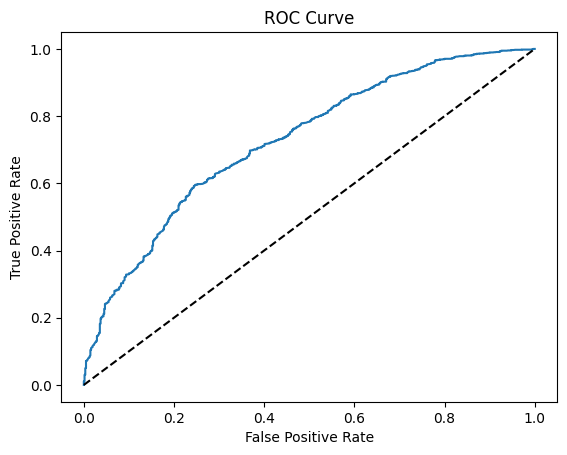

In [72]:
plt.plot(fpr,tpr)
plt.plot(fpr,fpr, linestyle='--', color='k')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')

In [73]:
AUROC = roc_auc_score(df_actual_predicted_probs['loan_data_targets_test'], df_actual_predicted_probs['y_hat_test_proba'])
AUROC

0.7265484425501161

#### Model Performance: Gini and KS

In [74]:
df_actual_predicted_probs = df_actual_predicted_probs.sort_values('y_hat_test_proba')
df_actual_predicted_probs.head()

,loan_data_targets_test,y_hat_test_proba,y_hat_test
4328,0,0.113323,0
6273,0,0.120056,0
456,1,0.129757,0
333,0,0.129757,0
23,1,0.135196,0


In [75]:
df_actual_predicted_probs.tail()

,loan_data_targets_test,y_hat_test_proba,y_hat_test
10323,1,0.975392,1
3400,1,0.976428,1
2582,1,0.976428,1
10467,1,0.976693,1
4486,1,0.976693,1


In [76]:
df_actual_predicted_probs = df_actual_predicted_probs.reset_index()
df_actual_predicted_probs.head()

,index,loan_data_targets_test,y_hat_test_proba,y_hat_test
0,4328,0,0.113323,0
1,6273,0,0.120056,0
2,456,1,0.129757,0
3,333,0,0.129757,0
4,23,1,0.135196,0


In [77]:
df_actual_predicted_probs['Cumulative N Population'] = df_actual_predicted_probs.index + 1
# We calculate the cumulative number of all observations.
# We use the new index for that. Since indexing in ython starts from 0, we add 1 to each index.
df_actual_predicted_probs['Cumulative N Good'] = df_actual_predicted_probs['loan_data_targets_test'].cumsum()
# We calculate cumulative number of 'good', which is the cumulative sum of the column with actual observations.
df_actual_predicted_probs['Cumulative N Bad'] = df_actual_predicted_probs['Cumulative N Population'] - df_actual_predicted_probs['loan_data_targets_test'].cumsum()
# We calculate cumulative number of 'bad', which is
# the difference between the cumulative number of all observations and cumulative number of 'good' for each row.
df_actual_predicted_probs.head()

,index,loan_data_targets_test,y_hat_test_proba,y_hat_test,Cumulative N Population,Cumulative N Good,Cumulative N Bad
0,4328,0,0.113323,0,1,0,1
1,6273,0,0.120056,0,2,0,2
2,456,1,0.129757,0,3,1,2
3,333,0,0.129757,0,4,1,3
4,23,1,0.135196,0,5,2,3


In [78]:
df_actual_predicted_probs['Cumulative Perc Population'] = df_actual_predicted_probs['Cumulative N Population'] / (df_actual_predicted_probs.shape[0])
# We calculate the cumulative percentage of all observations.
df_actual_predicted_probs['Cumulative Perc Good'] = df_actual_predicted_probs['Cumulative N Good'] / df_actual_predicted_probs['loan_data_targets_test'].sum()
# We calculate cumulative percentage of 'good'.
df_actual_predicted_probs['Cumulative Perc Bad'] = df_actual_predicted_probs['Cumulative N Bad'] / (df_actual_predicted_probs.shape[0] - df_actual_predicted_probs['loan_data_targets_test'].sum())
# We calculate the cumulative percentage of 'bad'.
df_actual_predicted_probs.head()

,index,loan_data_targets_test,y_hat_test_proba,y_hat_test,Cumulative N Population,Cumulative N Good,Cumulative N Bad,Cumulative Perc Population,Cumulative Perc Good,Cumulative Perc Bad
0,4328,0,0.113323,0,1,0,1,0.000466,0.000000,0.001616
1,6273,0,0.120056,0,2,0,2,0.000931,0.000000,0.003231
2,456,1,0.129757,0,3,1,2,0.001397,0.000654,0.003231
3,333,0,0.129757,0,4,1,3,0.001862,0.000654,0.004847
4,23,1,0.135196,0,5,2,3,0.002328,0.001308,0.004847


Text(0.5, 1.0, 'Gini')

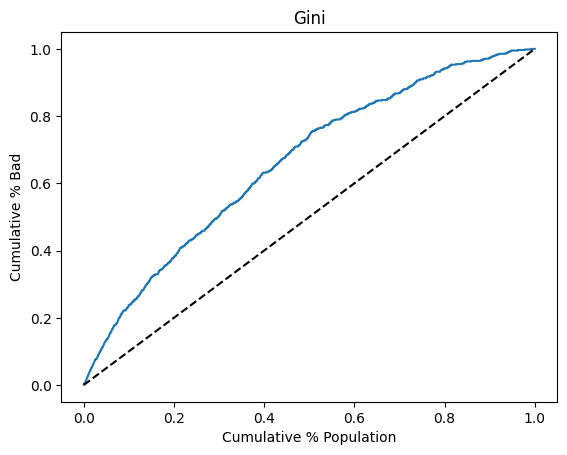

In [79]:
# Plot Gini
plt.plot(df_actual_predicted_probs['Cumulative Perc Population'], df_actual_predicted_probs['Cumulative Perc Bad'])
# We plot the cumulative percentage of all along the x-axis and the cumulative percentage 'good' along the y-axis,
# thus plotting the Gini curve.
plt.plot(df_actual_predicted_probs['Cumulative Perc Population'], df_actual_predicted_probs['Cumulative Perc Population'], linestyle = '--', color = 'k')
# We plot a seconary diagonal line, with dashed line style and black color.
plt.xlabel('Cumulative % Population')
# We name the x-axis "Cumulative % Population".
plt.ylabel('Cumulative % Bad')
# We name the y-axis "Cumulative % Bad".
plt.title('Gini')
# We name the graph "Gini".

In [80]:
Gini = AUROC * 2 - 1
# Here we calculate Gini from AUROC.
Gini

0.45309688510023216

Text(0.5, 1.0, 'Kolmogorov-Smirnov')

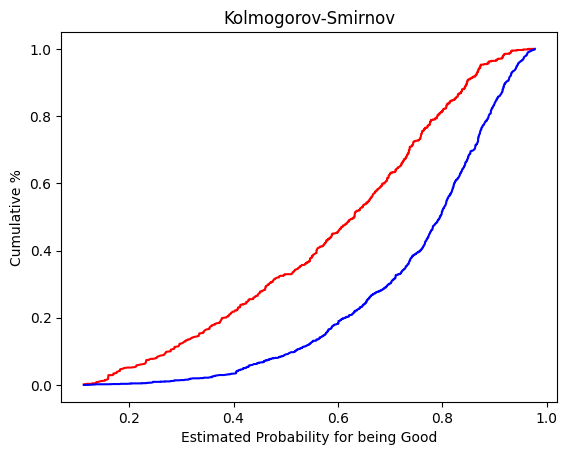

In [81]:
# Plot KS
plt.plot(df_actual_predicted_probs['y_hat_test_proba'], df_actual_predicted_probs['Cumulative Perc Bad'], color = 'r')
# We plot the predicted (estimated) probabilities along the x-axis and the cumulative percentage 'bad' along the y-axis,
# colored in red.
plt.plot(df_actual_predicted_probs['y_hat_test_proba'], df_actual_predicted_probs['Cumulative Perc Good'], color = 'b')
# We plot the predicted (estimated) probabilities along the x-axis and the cumulative percentage 'good' along the y-axis,
# colored in red.
plt.xlabel('Estimated Probability for being Good')
# We name the x-axis "Estimated Probability for being Good".
plt.ylabel('Cumulative %')
# We name the y-axis "Cumulative %".
plt.title('Kolmogorov-Smirnov')
# We name the graph "Kolmogorov-Smirnov".

In [82]:
KS = max(df_actual_predicted_probs['Cumulative Perc Bad'] - df_actual_predicted_probs['Cumulative Perc Good'])
# We calculate KS from the data. It is the maximum of the difference between the cumulative percentage of 'bad'
# and the cumulative percentage of 'good'.
KS

0.34894886264582103

### Calculating PD of individual accounts

In [83]:
inputs_test2.head()

,const,VAR_2:0,VAR_20:3-10,VAR_32:>=0.13,VAR_60:-0.25to-0.004,VAR_60:>-0.004,months_since_cr_line:39,months_since_cr_line:40,months_since_cr_line:41-46,months_since_cr_line:47-48,VAR_1:<=4.16,VAR_1:4.16-66.56,VAR_1:66.56-128.96,VAR_7:<=62.138,VAR_7:>62.138,VAR_9:<=606.0,VAR_17:<=2833.422,VAR_17:>2833.422,VAR_65:<=1120.334,VAR_65:>1120.334
6870,1.0,0,0,1,0,1,0,0,1,0,0,0,1,1,0,0,0,1,1,0
3881,1.0,1,0,0,0,0,0,0,1,0,0,1,0,1,0,0,1,0,1,0
6010,1.0,1,0,1,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1
10552,1.0,1,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0
8602,1.0,1,1,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0


In [84]:
inputs_test2.columns.values

array(['const', 'VAR_2:0', 'VAR_20:3-10', 'VAR_32:>=0.13',
       'VAR_60:-0.25to-0.004', 'VAR_60:>-0.004',
       'months_since_cr_line:39', 'months_since_cr_line:40',
       'months_since_cr_line:41-46', 'months_since_cr_line:47-48',
       'VAR_1:<=4.16', 'VAR_1:4.16-66.56', 'VAR_1:66.56-128.96',
       'VAR_7:<=62.138', 'VAR_7:>62.138', 'VAR_9:<=606.0',
       'VAR_17:<=2833.422', 'VAR_17:>2833.422', 'VAR_65:<=1120.334',
       'VAR_65:>1120.334'], dtype=object)

In [85]:
vals = ['VAR_1:<=4.16', 'VAR_1:4.16-66.56', 'VAR_1:66.56-128.96',
       'VAR_7:<=62.138', 'VAR_7:>62.138', 'VAR_9:<=606.0',
       'VAR_17:<=2833.422', 'VAR_17:>2833.422', 'VAR_65:<=1120.334',
       'VAR_65:>1120.334']
inputs_test2.head(1)[vals]

,VAR_1:<=4.16,VAR_1:4.16-66.56,VAR_1:66.56-128.96,VAR_7:<=62.138,VAR_7:>62.138,VAR_9:<=606.0,VAR_17:<=2833.422,VAR_17:>2833.422,VAR_65:<=1120.334,VAR_65:>1120.334
6870,0,0,1,1,0,0,0,1,1,0


In [86]:
print(log_reg2.summary2())

                              Results: Logit
Model:                   Logit               Method:              MLE      
Dependent Variable:      target              Pseudo R-squared:    0.148    
Date:                    2024-10-07 13:47    AIC:                 8886.0297
No. Observations:        8590                BIC:                 9027.1967
Df Model:                19                  Log-Likelihood:      -4423.0  
Df Residuals:            8570                LL-Null:             -5188.4  
Converged:               1.0000              LLR p-value:         0.0000   
No. Iterations:          6.0000              Scale:               1.0000   
---------------------------------------------------------------------------
                            Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
---------------------------------------------------------------------------
const                      -1.9851   0.1308 -15.1826 0.0000 -2.2414 -1.7289
VAR_2:0                     0.2868   0.1623

- Taking the first cliente, 6870:
    - Intercept is -1.9851 
    - VAR_2: 1 for reference -> coeff 0
    - VAR_20: 1 for reference -> coeff 0
    - VAR_32: 1 for VAR_32:>=0.13 -> coeff 0.7098
    - VAR_60: 1 for VAR_60:>-0.004 -> coeff 0.5384
    - months_since_cr_line: 1 for months_since_cr_line:41-46 -> coeff 0.6936
    - VAR_1: 1 for VAR_1:66.56-128.96 -> coeff 0.2957
    - VAR_7: 1 for VAR_7:<=62.138 -> coeff -0.0441
    - VAR_9: 1 for VAR_9:<=606.0 -> coeff 0.6443
    - VAR_17: 1 for VAR_17:>2833.422 -> coeff 0.6854
    - VAR_65: 1 for VAR_65:<=1120.334 -> coeff -0.3678 
 
ln((1-PD)/PD) = -1.9851 + 0 + 0 + 0.7098 + 0.5384 + 0.6936 + 0.2957 -0.0441 + 0.6443 + 0.6854  -0.3678 = 1.1702

(1-PD)/PD = $\exp^{1.1702}$ = 1.691980946183903

(1-PD) = $\frac{3.222637101500354}{(3.222637101500354 + 1)}$ = 0.7631811647643868

Therefore, the probability of not default for this person is 76.31%. Hence, the probability of default is 23,69%

### Creating a Scorecard

#### 1. First include references categories in summary table

In [87]:
df_ref_cat = pd.DataFrame(reference_features, columns= ['Feature name'])
df_ref_cat['Coefficients'] = 0
df_ref_cat

,Feature name,Coefficients
0,VAR_2:1-14_or_missing,0
1,VAR_20:11-12,0
2,VAR_32:<0.13,0
3,VAR_60:<-.025,0
4,months_since_cr_line:37-38,0
5,VAR_1:>128.96_or_missing,0
6,VAR_7:Missing,0
7,VAR_9:>606.0,0
8,VAR_17:Missing,0
9,VAR_65:Missing,0


#### 2. Create a Data Frame for Scorecard and concatenate the references categories to the regression categories

In [88]:
summary_table = pd.DataFrame(log_reg2.summary2().tables[1]).reset_index()[['index','Coef.']].rename(columns={'index':'Feature name','Coef.':'Coefficients'})
summary_table

,Feature name,Coefficients
0,const,-1.985133
1,VAR_2:0,0.286824
2,VAR_20:3-10,0.713999
3,VAR_32:>=0.13,0.709810
4,VAR_60:-0.25to-0.004,0.047328
5,VAR_60:>-0.004,0.538387
6,months_since_cr_line:39,0.309392
7,months_since_cr_line:40,0.120954
8,months_since_cr_line:41-46,0.693642
9,months_since_cr_line:47-48,0.493888


In [89]:
df_scorecard = pd.concat([summary_table, df_ref_cat], axis=0).reset_index()
df_scorecard.tail(20)

,index,Feature name,Coefficients
10,10,VAR_1:<=4.16,1.680864
11,11,VAR_1:4.16-66.56,1.200068
12,12,VAR_1:66.56-128.96,0.295658
13,13,VAR_7:<=62.138,-0.044097
14,14,VAR_7:>62.138,-0.180218
15,15,VAR_9:<=606.0,0.644307
16,16,VAR_17:<=2833.422,0.452719
17,17,VAR_17:>2833.422,0.685426
18,18,VAR_65:<=1120.334,-0.367764
19,19,VAR_65:>1120.334,-0.011571


#### 3. Set the original name for each feature 

In [90]:
df_scorecard['Original feature name'] = df_scorecard['Feature name'].str.split(':').str[0]
df_scorecard.head(10)

,index,Feature name,Coefficients,Original feature name
0,0,const,-1.985133,const
1,1,VAR_2:0,0.286824,VAR_2
2,2,VAR_20:3-10,0.713999,VAR_20
3,3,VAR_32:>=0.13,0.709810,VAR_32
4,4,VAR_60:-0.25to-0.004,0.047328,VAR_60
5,5,VAR_60:>-0.004,0.538387,VAR_60
6,6,months_since_cr_line:39,0.309392,months_since_cr_line
7,7,months_since_cr_line:40,0.120954,months_since_cr_line
8,8,months_since_cr_line:41-46,0.693642,months_since_cr_line
9,9,months_since_cr_line:47-48,0.493888,months_since_cr_line


#### 4. Turn the regression coefficients into a simple scores

##### 4.1 Decide the maximum and the minimum score

In [91]:
min_score = 2
max_score = 1000

##### 4.2 Identify the coeffient that gives us the max PD and te min PD (max PD is where the coef is min, and min PD is where the coed is max)

In [92]:
df_scorecard.groupby('Original feature name')['Coefficients'].min()

Original feature name
VAR_1                   0.000000
VAR_17                  0.000000
VAR_2                   0.000000
VAR_20                  0.000000
VAR_32                  0.000000
VAR_60                  0.000000
VAR_65                 -0.367764
VAR_7                  -0.180218
VAR_9                   0.000000
const                  -1.985133
months_since_cr_line    0.000000
Name: Coefficients, dtype: float64

In [93]:
min_sum_coef = df_scorecard.groupby('Original feature name')['Coefficients'].min().sum()
min_sum_coef

-2.533115041080075

In [94]:
# (1-PD)/PD = exp(-2.533115041080075)
np.exp(-2.533115041080075)

0.07941126524920797

In [95]:
#(1-PD) = exp(0.07941126524920797)/(exp(0.07941126524920797) + 1)
0.07941126524920797/(0.07941126524920797+1)

0.07356905361819989

In [96]:
# PD
1 - 0.07356905361819989

0.9264309463818001

In [97]:
df_scorecard.groupby('Original feature name')['Coefficients'].max()

Original feature name
VAR_1                   1.680864
VAR_17                  0.685426
VAR_2                   0.286824
VAR_20                  0.713999
VAR_32                  0.709810
VAR_60                  0.538387
VAR_65                  0.000000
VAR_7                   0.000000
VAR_9                   0.644307
const                  -1.985133
months_since_cr_line    0.693642
Name: Coefficients, dtype: float64

In [98]:
max_sum_coef = df_scorecard.groupby('Original feature name')['Coefficients'].max().sum()
max_sum_coef

3.968127071821801

In [99]:
# (1-PD)/PD = exp(3.968127071821801)
np.exp(3.968127071821801)

52.88538749202437

In [100]:
#(1-PD) = exp(52.88538749202437)/(exp(52.88538749202437) + 1)
52.88538749202437/(52.88538749202437+1)

0.9814420931806789

In [101]:
# PD
1 - 0.9814420931806789

0.018557906819321124

##### 4.3 Rescale the coefficients to score

In [102]:
df_scorecard['Score-Calculation'] = df_scorecard['Coefficients']*((max_score-min_score)/(max_sum_coef-min_sum_coef))
df_scorecard

,index,Feature name,Coefficients,Original feature name,Score-Calculation
0,0,const,-1.985133,const,-304.735959
1,1,VAR_2:0,0.286824,VAR_2,44.030064
2,2,VAR_20:3-10,0.713999,VAR_20,109.605328
3,3,VAR_32:>=0.13,0.709810,VAR_32,108.962373
4,4,VAR_60:-0.25to-0.004,0.047328,VAR_60,7.265250
5,5,VAR_60:>-0.004,0.538387,VAR_60,82.647381
6,6,months_since_cr_line:39,0.309392,months_since_cr_line,47.494505
7,7,months_since_cr_line:40,0.120954,months_since_cr_line,18.567592
8,8,months_since_cr_line:41-46,0.693642,months_since_cr_line,106.480443
9,9,months_since_cr_line:47-48,0.493888,months_since_cr_line,75.816379


In [103]:
df_scorecard['Score-Calculation'][0] = ((df_scorecard['Coefficients'][0] - min_sum_coef)/(max_sum_coef-min_sum_coef)) * (max_score-min_score) + min_score
df_scorecard

/tmp/ipykernel_4508/3720303001.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_scorecard['Score-Calculation'][0] = ((df_scorecard['Coefficients'][0] - min_sum_coef)/(max_sum_coef-min_sum_coef)) * (max_score-min_score) + min_score


,index,Feature name,Coefficients,Original feature name,Score-Calculation
0,0,const,-1.985133,const,86.120319
1,1,VAR_2:0,0.286824,VAR_2,44.030064
2,2,VAR_20:3-10,0.713999,VAR_20,109.605328
3,3,VAR_32:>=0.13,0.709810,VAR_32,108.962373
4,4,VAR_60:-0.25to-0.004,0.047328,VAR_60,7.265250
5,5,VAR_60:>-0.004,0.538387,VAR_60,82.647381
6,6,months_since_cr_line:39,0.309392,months_since_cr_line,47.494505
7,7,months_since_cr_line:40,0.120954,months_since_cr_line,18.567592
8,8,months_since_cr_line:41-46,0.693642,months_since_cr_line,106.480443
9,9,months_since_cr_line:47-48,0.493888,months_since_cr_line,75.816379


In [104]:
df_scorecard['Score-Preliminary'] = df_scorecard['Score-Calculation'].round()
df_scorecard

,index,Feature name,Coefficients,Original feature name,Score-Calculation,Score-Preliminary
0,0,const,-1.985133,const,86.120319,86.0
1,1,VAR_2:0,0.286824,VAR_2,44.030064,44.0
2,2,VAR_20:3-10,0.713999,VAR_20,109.605328,110.0
3,3,VAR_32:>=0.13,0.709810,VAR_32,108.962373,109.0
4,4,VAR_60:-0.25to-0.004,0.047328,VAR_60,7.265250,7.0
5,5,VAR_60:>-0.004,0.538387,VAR_60,82.647381,83.0
6,6,months_since_cr_line:39,0.309392,months_since_cr_line,47.494505,47.0
7,7,months_since_cr_line:40,0.120954,months_since_cr_line,18.567592,19.0
8,8,months_since_cr_line:41-46,0.693642,months_since_cr_line,106.480443,106.0
9,9,months_since_cr_line:47-48,0.493888,months_since_cr_line,75.816379,76.0


In [105]:
min_sum_score_prel = df_scorecard.groupby('Original feature name')['Score-Preliminary'].min().sum()
min_sum_score_prel

2.0

In [106]:
max_sum_score_prel = df_scorecard.groupby('Original feature name')['Score-Preliminary'].max().sum()
max_sum_score_prel

1000.0

In [107]:
# As the min is 2 and the max is 1000 we are done.
df_scorecard['Score-Final'] = df_scorecard['Score-Preliminary']
df_scorecard

,index,Feature name,Coefficients,Original feature name,Score-Calculation,Score-Preliminary,Score-Final
0,0,const,-1.985133,const,86.120319,86.0,86.0
1,1,VAR_2:0,0.286824,VAR_2,44.030064,44.0,44.0
2,2,VAR_20:3-10,0.713999,VAR_20,109.605328,110.0,110.0
3,3,VAR_32:>=0.13,0.709810,VAR_32,108.962373,109.0,109.0
4,4,VAR_60:-0.25to-0.004,0.047328,VAR_60,7.265250,7.0,7.0
5,5,VAR_60:>-0.004,0.538387,VAR_60,82.647381,83.0,83.0
6,6,months_since_cr_line:39,0.309392,months_since_cr_line,47.494505,47.0,47.0
7,7,months_since_cr_line:40,0.120954,months_since_cr_line,18.567592,19.0,19.0
8,8,months_since_cr_line:41-46,0.693642,months_since_cr_line,106.480443,106.0,106.0
9,9,months_since_cr_line:47-48,0.493888,months_since_cr_line,75.816379,76.0,76.0


### Calculating Credit Score for individual

In [108]:
df_scorecard[df_scorecard['Original feature name'] == 'VAR_65']

,index,Feature name,Coefficients,Original feature name,Score-Calculation,Score-Preliminary,Score-Final
18,18,VAR_65:<=1120.334,-0.367764,VAR_65,-56.455158,-56.0,-56.0
19,19,VAR_65:>1120.334,-0.011571,VAR_65,-1.776285,-2.0,-2.0
29,9,VAR_65:Missing,0.000000,VAR_65,0.000000,0.0,0.0


To calculate the credit score for a borrower, we have to sum the credit score corresponding to the respective dummy variable categories

- Taking the first cliente, 6870:
    - Intercept is -1.9851 -> score 86
    - VAR_2: 1 for reference -> coeff 0 -> score 0
    - VAR_20: 1 for reference -> coeff 0 -> score 0
    - VAR_32: 1 for VAR_32:>=0.13 -> coeff 0.7098 -> score 109
    - VAR_60: 1 for VAR_60:>-0.004 -> coeff 0.5384 -> score 83
    - months_since_cr_line: 1 for months_since_cr_line:41-46 -> coeff 0.6936 -> score 106
    - VAR_1: 1 for VAR_1:66.56-128.96 -> coeff 0.2957 -> score 45
    - VAR_7: 1 for VAR_7:<=62.138 -> coeff -0.0441 -> score -7
    - VAR_9: 1 for VAR_9<=606.0 -> coeff 0.6443 -> score 99
    - VAR_17: 1 for VAR_17:>2833.422 -> coeff 0.6854 -> score 105
    - VAR_65: 1 for VAR_65:<=1120.334 -> coeff -0.3678 -> score -56
    
Final score = 86 + 0 + 0 + 109 + 83 + 106 + 45 - 7 + 99 + 105 - 56 = 570

### Calculating Credit Score for all data set

In [109]:
inputs_test2_w_intercept = inputs_test_with_ref2
inputs_test2_w_intercept.head()

,VAR_2:0,VAR_2:1-14_or_missing,VAR_20:3-10,VAR_20:11-12,VAR_32:<0.13,VAR_32:>=0.13,VAR_60:<-.025,VAR_60:-0.25to-0.004,VAR_60:>-0.004,months_since_cr_line:37-38,...,VAR_7:<=62.138,VAR_7:>62.138,VAR_9:<=606.0,VAR_9:>606.0,VAR_17:Missing,VAR_17:<=2833.422,VAR_17:>2833.422,VAR_65:Missing,VAR_65:<=1120.334,VAR_65:>1120.334
6870,0,1,0,1,0,1,0,0,1,0,...,1,0,0,1,0,0,1,0,1,0
3881,1,0,0,1,1,0,1,0,0,0,...,1,0,0,1,0,1,0,0,1,0
6010,1,0,0,1,0,1,0,1,0,0,...,0,0,0,1,1,0,0,0,0,1
10552,1,0,0,1,0,1,0,0,1,1,...,0,1,0,1,1,0,0,0,1,0
8602,1,0,1,0,1,0,0,1,0,1,...,0,1,0,1,1,0,0,0,1,0


In [110]:
inputs_test2_w_intercept.insert(0,'const',1)
inputs_test2_w_intercept.head()

,const,VAR_2:0,VAR_2:1-14_or_missing,VAR_20:3-10,VAR_20:11-12,VAR_32:<0.13,VAR_32:>=0.13,VAR_60:<-.025,VAR_60:-0.25to-0.004,VAR_60:>-0.004,...,VAR_7:<=62.138,VAR_7:>62.138,VAR_9:<=606.0,VAR_9:>606.0,VAR_17:Missing,VAR_17:<=2833.422,VAR_17:>2833.422,VAR_65:Missing,VAR_65:<=1120.334,VAR_65:>1120.334
6870,1,0,1,0,1,0,1,0,0,1,...,1,0,0,1,0,0,1,0,1,0
3881,1,1,0,0,1,1,0,1,0,0,...,1,0,0,1,0,1,0,0,1,0
6010,1,1,0,0,1,0,1,0,1,0,...,0,0,0,1,1,0,0,0,0,1
10552,1,1,0,0,1,0,1,0,0,1,...,0,1,0,1,1,0,0,0,1,0
8602,1,1,0,1,0,1,0,0,1,0,...,0,1,0,1,1,0,0,0,1,0


In [111]:
df_scorecard['Feature name'].values

array(['const', 'VAR_2:0', 'VAR_20:3-10', 'VAR_32:>=0.13',
       'VAR_60:-0.25to-0.004', 'VAR_60:>-0.004',
       'months_since_cr_line:39', 'months_since_cr_line:40',
       'months_since_cr_line:41-46', 'months_since_cr_line:47-48',
       'VAR_1:<=4.16', 'VAR_1:4.16-66.56', 'VAR_1:66.56-128.96',
       'VAR_7:<=62.138', 'VAR_7:>62.138', 'VAR_9:<=606.0',
       'VAR_17:<=2833.422', 'VAR_17:>2833.422', 'VAR_65:<=1120.334',
       'VAR_65:>1120.334', 'VAR_2:1-14_or_missing', 'VAR_20:11-12',
       'VAR_32:<0.13', 'VAR_60:<-.025', 'months_since_cr_line:37-38',
       'VAR_1:>128.96_or_missing', 'VAR_7:Missing', 'VAR_9:>606.0',
       'VAR_17:Missing', 'VAR_65:Missing'], dtype=object)

In [112]:
inputs_test2_w_intercept = inputs_test2_w_intercept[df_scorecard['Feature name'].values]
inputs_test2_w_intercept.head()

,const,VAR_2:0,VAR_20:3-10,VAR_32:>=0.13,VAR_60:-0.25to-0.004,VAR_60:>-0.004,months_since_cr_line:39,months_since_cr_line:40,months_since_cr_line:41-46,months_since_cr_line:47-48,...,VAR_2:1-14_or_missing,VAR_20:11-12,VAR_32:<0.13,VAR_60:<-.025,months_since_cr_line:37-38,VAR_1:>128.96_or_missing,VAR_7:Missing,VAR_9:>606.0,VAR_17:Missing,VAR_65:Missing
6870,1,0,0,1,0,1,0,0,1,0,...,1,1,0,0,0,0,0,1,0,0
3881,1,1,0,0,0,0,0,0,1,0,...,0,1,1,1,0,0,0,1,0,0
6010,1,1,0,1,1,0,0,0,0,1,...,0,1,0,0,0,0,1,1,1,0
10552,1,1,0,1,0,1,0,0,0,0,...,0,1,0,0,1,0,0,1,1,0
8602,1,1,1,0,1,0,0,0,0,0,...,0,0,1,0,1,0,0,1,1,0


In [113]:
scorecard_scores = df_scorecard['Score-Final']
scorecard_scores.head()

0     86.0
1     44.0
2    110.0
3    109.0
4      7.0
Name: Score-Final, dtype: float64

In [114]:
inputs_test2_w_intercept.shape

(2148, 30)

In [115]:
scorecard_scores.shape

(30,)

In [116]:
scorecard_scores = scorecard_scores.values.reshape(30,1)
scorecard_scores.shape

(30, 1)

In [117]:
y_scores = inputs_test2_w_intercept.dot(scorecard_scores)
y_scores

,0
6870,471.0
3881,426.0
6010,578.0
10552,422.0
8602,347.0
...,...
353,609.0
456,99.0
8736,336.0
239,304.0


### From credit score to PD

In [118]:
sum_coef_from_score = ((y_scores-min_score)/(max_score-min_score)) * (max_sum_coef - min_sum_coef) + min_sum_coef
sum_coef_from_score

,0
6870,0.522078
3881,0.228936
6010,1.219105
10552,0.202879
8602,-0.285692
...,...
353,1.421047
456,-1.901231
8736,-0.357349
239,-0.565805


In [119]:
y_hat_proba_from_score = np.exp(sum_coef_from_score.astype(float)) / (np.exp(sum_coef_from_score.astype(float)) + 1)
y_hat_proba_from_score.head()

,0
6870,0.627634
3881,0.556985
6010,0.771906
10552,0.550546
8602,0.429059


In [120]:
y_hat_test[0:5]

,0
0,0.628533
1,0.558792
2,0.772417
3,0.550323
4,0.429254


It is not exactly equal is because we rounded the score when we transformed the PD model to score

### Cut off PD rate to decide if approve the credit or not

Text(0.5, 1.0, 'ROC Curve')

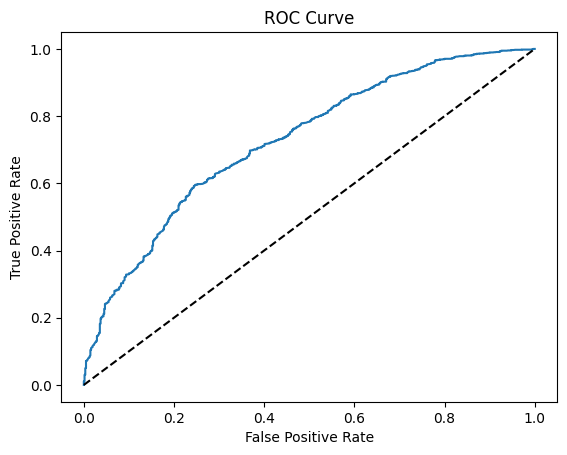

In [121]:
plt.plot(fpr,tpr)
plt.plot(fpr,fpr, linestyle='--', color='k')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')

In [123]:
thresholds.shape

(897,)

In [124]:
df_cutoffs = pd.concat([pd.DataFrame(thresholds), pd.DataFrame(fpr), pd.DataFrame(tpr)], axis=1)
df_cutoffs.columns = ['thresholds','fpr','tpr']
df_cutoffs

,thresholds,fpr,tpr
0,inf,0.000000,0.000000
1,0.976693,0.000000,0.001308
2,0.976428,0.000000,0.002616
3,0.975392,0.000000,0.003270
4,0.972247,0.000000,0.004578
...,...,...,...
892,0.142810,0.991922,0.998038
893,0.137114,0.995153,0.998038
894,0.135196,0.995153,0.999346
895,0.129757,0.996769,1.000000


In [125]:
df_cutoffs['thresholds'][0] = 1 - 1 / np.power(10,16)
df_cutoffs.head()

,thresholds,fpr,tpr
0,1.000000,0.0,0.000000
1,0.976693,0.0,0.001308
2,0.976428,0.0,0.002616
3,0.975392,0.0,0.003270
4,0.972247,0.0,0.004578


In [126]:
df_cutoffs['Score'] = ((np.log(df_cutoffs['thresholds'] / (1 - df_cutoffs['thresholds'])) - min_sum_coef) * ((max_score - min_score) / (max_sum_coef - min_sum_coef)) + min_score).round()
df_cutoffs.head()

,thresholds,fpr,tpr,Score
0,1.000000,0.0,0.000000,6030.0
1,0.976693,0.0,0.001308,964.0
2,0.976428,0.0,0.002616,963.0
3,0.975392,0.0,0.003270,956.0
4,0.972247,0.0,0.004578,937.0


In [127]:
df_cutoffs['Score'][0] = max_score
df_cutoffs.head()

,thresholds,fpr,tpr,Score
0,1.000000,0.0,0.000000,1000.0
1,0.976693,0.0,0.001308,964.0
2,0.976428,0.0,0.002616,963.0
3,0.975392,0.0,0.003270,956.0
4,0.972247,0.0,0.004578,937.0


In [128]:
df_cutoffs.tail()

,thresholds,fpr,tpr,Score
892,0.142810,0.991922,0.998038,116.0
893,0.137114,0.995153,0.998038,108.0
894,0.135196,0.995153,0.999346,106.0
895,0.129757,0.996769,1.000000,99.0
896,0.113323,1.000000,1.000000,75.0


In [129]:
df_actual_predicted_probs.head()

,index,loan_data_targets_test,y_hat_test_proba,y_hat_test,Cumulative N Population,Cumulative N Good,Cumulative N Bad,Cumulative Perc Population,Cumulative Perc Good,Cumulative Perc Bad
0,4328,0,0.113323,0,1,0,1,0.000466,0.000000,0.001616
1,6273,0,0.120056,0,2,0,2,0.000931,0.000000,0.003231
2,456,1,0.129757,0,3,1,2,0.001397,0.000654,0.003231
3,333,0,0.129757,0,4,1,3,0.001862,0.000654,0.004847
4,23,1,0.135196,0,5,2,3,0.002328,0.001308,0.004847


In [130]:
def n_approved(p):
    return np.where(df_actual_predicted_probs['y_hat_test_proba'] >= p, 1, 0).sum()

In [131]:
df_actual_predicted_probs.head()

,index,loan_data_targets_test,y_hat_test_proba,y_hat_test,Cumulative N Population,Cumulative N Good,Cumulative N Bad,Cumulative Perc Population,Cumulative Perc Good,Cumulative Perc Bad
0,4328,0,0.113323,0,1,0,1,0.000466,0.000000,0.001616
1,6273,0,0.120056,0,2,0,2,0.000931,0.000000,0.003231
2,456,1,0.129757,0,3,1,2,0.001397,0.000654,0.003231
3,333,0,0.129757,0,4,1,3,0.001862,0.000654,0.004847
4,23,1,0.135196,0,5,2,3,0.002328,0.001308,0.004847


In [132]:
df_cutoffs['N Approved'] = df_cutoffs['thresholds'].apply(n_approved)
df_cutoffs['N Rejected'] = df_actual_predicted_probs['y_hat_test_proba'].shape[0] - df_cutoffs['N Approved']
df_cutoffs['Approval Rate'] = df_cutoffs['N Approved'] / df_actual_predicted_probs['y_hat_test_proba'].shape[0]
df_cutoffs['Rejection Rate'] = 1 - df_cutoffs['Approval Rate']
df_cutoffs.head()

,thresholds,fpr,tpr,Score,N Approved,N Rejected,Approval Rate,Rejection Rate
0,1.000000,0.0,0.000000,1000.0,0,2148,0.000000,1.000000
1,0.976693,0.0,0.001308,964.0,2,2146,0.000931,0.999069
2,0.976428,0.0,0.002616,963.0,4,2144,0.001862,0.998138
3,0.975392,0.0,0.003270,956.0,5,2143,0.002328,0.997672
4,0.972247,0.0,0.004578,937.0,7,2141,0.003259,0.996741


In [133]:
df_cutoffs.shape

(897, 8)

In [134]:
df_cutoffs['Approval Rate'].value_counts()

Approval Rate
0.000000    1
0.551210    1
0.680633    1
0.681099    1
0.682495    1
           ..
0.398045    1
0.399441    1
0.400372    1
0.400838    1
1.000000    1
Name: count, Length: 897, dtype: int64

Let's assume the highest level of probability of default the IF'd accept is 10%

In [135]:
df_cutoffs.iloc[90: 100, ]

,thresholds,fpr,tpr,Score,N Approved,N Rejected,Approval Rate,Rejection Rate
90,0.901882,0.035541,0.155003,731.0,259,1889,0.120577,0.879423
91,0.901879,0.035541,0.156965,731.0,262,1886,0.121974,0.878026
92,0.900334,0.035541,0.160235,729.0,267,1881,0.124302,0.875698
93,0.900111,0.035541,0.161543,728.0,269,1879,0.125233,0.874767
94,0.900066,0.035541,0.163506,728.0,272,1876,0.126629,0.873371
95,0.899184,0.035541,0.165468,727.0,275,1873,0.128026,0.871974
96,0.898198,0.035541,0.169392,725.0,281,1867,0.130819,0.869181
97,0.897786,0.035541,0.170046,724.0,282,1866,0.131285,0.868715
98,0.896695,0.035541,0.172662,723.0,286,1862,0.133147,0.866853
99,0.896263,0.035541,0.175278,722.0,290,1858,0.135009,0.864991


Considering 10%, we have 0.126629 of approve rate and 0.873371 of rejection rate

Now let's assume the highest level of probability of default the IF'd accept is 5%

In [136]:
df_cutoffs.iloc[20: 40, ]

,thresholds,fpr,tpr,Score,N Approved,N Rejected,Approval Rate,Rejection Rate
20,0.955333,0.001616,0.030085,861.0,47,2101,0.021881,0.978119
21,0.954549,0.003231,0.030085,858.0,48,2100,0.022346,0.977654
22,0.954426,0.003231,0.031393,858.0,50,2098,0.023277,0.976723
23,0.953920,0.003231,0.032701,856.0,52,2096,0.024209,0.975791
24,0.953533,0.003231,0.034009,855.0,54,2094,0.025140,0.974860
25,0.947418,0.003231,0.040549,835.0,64,2084,0.029795,0.970205
26,0.946386,0.003231,0.041857,832.0,66,2082,0.030726,0.969274
27,0.944943,0.003231,0.044474,827.0,70,2078,0.032588,0.967412
28,0.944574,0.003231,0.045782,826.0,72,2076,0.033520,0.966480
29,0.943836,0.003231,0.049706,824.0,78,2070,0.036313,0.963687


Considering 5%, we have 0.025140 of approve rate and 0.974860 of rejection rate

In [137]:
inputs_train_with_ref2.head()

,VAR_2:0,VAR_2:1-14_or_missing,VAR_20:3-10,VAR_20:11-12,VAR_32:<0.13,VAR_32:>=0.13,VAR_60:<-.025,VAR_60:-0.25to-0.004,VAR_60:>-0.004,months_since_cr_line:37-38,...,VAR_7:<=62.138,VAR_7:>62.138,VAR_9:<=606.0,VAR_9:>606.0,VAR_17:Missing,VAR_17:<=2833.422,VAR_17:>2833.422,VAR_65:Missing,VAR_65:<=1120.334,VAR_65:>1120.334
7477,1,0,0,1,1,0,0,0,1,0,...,1,0,0,1,1,0,0,0,1,0
9608,1,0,0,1,1,0,0,1,0,0,...,1,0,0,1,1,0,0,0,0,1
2732,1,0,0,1,1,0,0,0,1,0,...,0,1,0,1,0,1,0,0,1,0
9250,1,0,1,0,0,1,0,0,1,0,...,0,0,0,1,0,1,0,0,1,0
7877,1,0,0,1,0,1,0,0,1,0,...,0,1,0,1,0,1,0,0,0,1


In [138]:
inputs_train_with_ref2.to_csv('inputs_train_with_ref_cat.csv')

In [139]:
df_scorecard.head()

,index,Feature name,Coefficients,Original feature name,Score-Calculation,Score-Preliminary,Score-Final
0,0,const,-1.985133,const,86.120319,86.0,86.0
1,1,VAR_2:0,0.286824,VAR_2,44.030064,44.0,44.0
2,2,VAR_20:3-10,0.713999,VAR_20,109.605328,110.0,110.0
3,3,VAR_32:>=0.13,0.709810,VAR_32,108.962373,109.0,109.0
4,4,VAR_60:-0.25to-0.004,0.047328,VAR_60,7.265250,7.0,7.0


In [140]:
df_scorecard.to_csv('df_scorecard.csv')

In [141]:
scorecard_scores.shape

(30, 1)

In [142]:
scorecard_scores = df_scorecard['Score-Final']
scorecard_scores = scorecard_scores.values.reshape(30,1)
scorecard_scores.shape

(30, 1)

In [143]:
inputs_train_with_ref_cat_w_intercept = inputs_train_with_ref2
inputs_train_with_ref_cat_w_intercept.insert(0,'const',1)
inputs_train_with_ref_cat_w_intercept = inputs_train_with_ref_cat_w_intercept[df_scorecard['Feature name'].values]
inputs_train_with_ref_cat_w_intercept.head(3)

,const,VAR_2:0,VAR_20:3-10,VAR_32:>=0.13,VAR_60:-0.25to-0.004,VAR_60:>-0.004,months_since_cr_line:39,months_since_cr_line:40,months_since_cr_line:41-46,months_since_cr_line:47-48,...,VAR_2:1-14_or_missing,VAR_20:11-12,VAR_32:<0.13,VAR_60:<-.025,months_since_cr_line:37-38,VAR_1:>128.96_or_missing,VAR_7:Missing,VAR_9:>606.0,VAR_17:Missing,VAR_65:Missing
7477,1,1,0,0,0,1,0,0,1,0,...,0,1,1,0,0,0,0,1,1,0
9608,1,1,0,0,1,0,0,0,0,1,...,0,1,1,0,0,0,0,1,1,0
2732,1,1,0,0,0,1,0,0,1,0,...,0,1,1,0,0,0,0,1,0,0


In [144]:
y_scores_train = inputs_train_with_ref_cat_w_intercept.dot(scorecard_scores)
y_scores_train.head(3)

,0
7477,440.0
9608,388.0
2732,562.0


In [145]:
inputs_train_with_ref_cat_w_intercept = pd.concat([inputs_train_with_ref_cat_w_intercept,y_scores_train], axis=1)

In [146]:
inputs_train_with_ref_cat_w_intercept.columns.values[inputs_train_with_ref_cat_w_intercept.shape[1]-1]= 'Score'
inputs_train_with_ref_cat_w_intercept.head()

,const,VAR_2:0,VAR_20:3-10,VAR_32:>=0.13,VAR_60:-0.25to-0.004,VAR_60:>-0.004,months_since_cr_line:39,months_since_cr_line:40,months_since_cr_line:41-46,months_since_cr_line:47-48,...,VAR_20:11-12,VAR_32:<0.13,VAR_60:<-.025,months_since_cr_line:37-38,VAR_1:>128.96_or_missing,VAR_7:Missing,VAR_9:>606.0,VAR_17:Missing,VAR_65:Missing,Score
7477,1,1,0,0,0,1,0,0,1,0,...,1,1,0,0,0,0,1,1,0,440.0
9608,1,1,0,0,1,0,0,0,0,1,...,1,1,0,0,0,0,1,1,0,388.0
2732,1,1,0,0,0,1,0,0,1,0,...,1,1,0,0,0,0,1,0,0,562.0
9250,1,1,1,1,0,1,0,0,1,0,...,0,0,0,0,0,1,1,0,0,735.0
7877,1,1,0,1,0,1,0,0,0,1,...,1,0,0,0,0,0,1,0,0,695.0


In [147]:
inputs_train_with_ref_cat_w_intercept.columns.values

array(['const', 'VAR_2:0', 'VAR_20:3-10', 'VAR_32:>=0.13',
       'VAR_60:-0.25to-0.004', 'VAR_60:>-0.004',
       'months_since_cr_line:39', 'months_since_cr_line:40',
       'months_since_cr_line:41-46', 'months_since_cr_line:47-48',
       'VAR_1:<=4.16', 'VAR_1:4.16-66.56', 'VAR_1:66.56-128.96',
       'VAR_7:<=62.138', 'VAR_7:>62.138', 'VAR_9:<=606.0',
       'VAR_17:<=2833.422', 'VAR_17:>2833.422', 'VAR_65:<=1120.334',
       'VAR_65:>1120.334', 'VAR_2:1-14_or_missing', 'VAR_20:11-12',
       'VAR_32:<0.13', 'VAR_60:<-.025', 'months_since_cr_line:37-38',
       'VAR_1:>128.96_or_missing', 'VAR_7:Missing', 'VAR_9:>606.0',
       'VAR_17:Missing', 'VAR_65:Missing', 'Score'], dtype=object)

In [148]:
inputs_train_with_ref_cat_w_intercept_tem = pd.concat([inputs_train_with_ref_cat_w_intercept,df_targets_train],axis=1)
inputs_train_with_ref_cat_w_intercept_tem.head()

,const,VAR_2:0,VAR_20:3-10,VAR_32:>=0.13,VAR_60:-0.25to-0.004,VAR_60:>-0.004,months_since_cr_line:39,months_since_cr_line:40,months_since_cr_line:41-46,months_since_cr_line:47-48,...,VAR_32:<0.13,VAR_60:<-.025,months_since_cr_line:37-38,VAR_1:>128.96_or_missing,VAR_7:Missing,VAR_9:>606.0,VAR_17:Missing,VAR_65:Missing,Score,target
7477,1,1,0,0,0,1,0,0,1,0,...,1,0,0,0,0,1,1,0,440.0,1
9608,1,1,0,0,1,0,0,0,0,1,...,1,0,0,0,0,1,1,0,388.0,0
2732,1,1,0,0,0,1,0,0,1,0,...,1,0,0,0,0,1,0,0,562.0,1
9250,1,1,1,1,0,1,0,0,1,0,...,0,0,0,0,1,1,0,0,735.0,1
7877,1,1,0,1,0,1,0,0,0,1,...,0,0,0,0,0,1,0,0,695.0,1


In [150]:
# Score range
bins = np.arange(0, 1100, 100)  # From 0 to 1000
labels = [f'{i-2}-{i+98}' for i in range(2, 1000, 100)]  # Range name
inputs_train_with_ref_cat_w_intercept_tem['score_range'] = pd.cut(inputs_train_with_ref_cat_w_intercept['Score'], bins=bins, labels=labels, include_lowest=True)

# Calculate number of clients and good clients for each range
result = inputs_train_with_ref_cat_w_intercept_tem.groupby('score_range').agg(
    number_clients=('Score', 'size'),
    number_goods=('target', 'sum')  #  1 = goods
)

# Calculate the percentage of bad clients
result['pct_bad'] = 100 - ((result['number_goods'] / result['number_clients']) * 100)

result = pd.DataFrame(result).reset_index()

/tmp/ipykernel_4508/2220624382.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  result = inputs_train_with_ref_cat_w_intercept_tem.groupby('score_range').agg(


In [151]:
result

,score_range,number_clients,number_goods,pct_bad
0,0-100,5,1,80.000000
1,100-200,138,18,86.956522
2,200-300,366,109,70.218579
3,300-400,997,451,54.764293
4,400-500,1574,969,38.437103
5,500-600,1939,1412,27.178958
6,600-700,1961,1641,16.318205
7,700-800,1176,1064,9.523810
8,800-900,380,363,4.473684
9,900-1000,54,53,1.851852


In [152]:
# Score range
bins = np.arange(0, 1200, 200)  # From 0 to 1000
labels = [f'{i-2}-{i+198}' for i in range(2, 1000, 200)]  # Range name
inputs_train_with_ref_cat_w_intercept_tem['score_range'] = pd.cut(inputs_train_with_ref_cat_w_intercept['Score'], bins=bins, labels=labels, include_lowest=True)

# Calculate the number of clients and good clients for each range
result = inputs_train_with_ref_cat_w_intercept_tem.groupby('score_range').agg(
    number_clients=('Score', 'size'),
    number_goods=('target', 'sum')  #  1 = goods
)

# Calculate the percentage of bad clients
result['pct_bad'] = 100 - ((result['number_goods'] / result['number_clients']) * 100)

result = pd.DataFrame(result).reset_index()

/tmp/ipykernel_4508/695074412.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  result = inputs_train_with_ref_cat_w_intercept_tem.groupby('score_range').agg(


In [153]:
result

,score_range,number_clients,number_goods,pct_bad
0,0-200,143,19,86.713287
1,200-400,1363,560,58.914160
2,400-600,3513,2381,32.223171
3,600-800,3137,2705,13.771119
4,800-1000,434,416,4.147465
